# Predicting Bigg Boss Hindi Season 15 Winner
#By- Aarush Kumar
#Dated: October 08,2021

In [1]:
from IPython.display import Image
Image(url='https://elements-cover-images-0.imgix.net/e189b71f-c744-4d3f-bc01-6b13be8d03fa?auto=compress%2Cformat&fit=max&w=900&s=59c3166f18fe6a59c6b6fa82effd9d6e')

In [2]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2021-Oct-08


## Importing Required Python Libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

## Check and import dataset

In [6]:
bigg_boss = pd.read_csv('/home/aarush100616/Downloads/Projects/Big Boss Prediciton/Data/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')


There are 738 rows and 24 columns in the dataset


## Exploratory Data Analysis (EDA)

In [8]:
bigg_boss.head(5)

Language  Season Number           Name      Profession       Gender  \
0    Hindi              1      Amit Sadh      Soap Actor         Male   
1    Hindi              1  Anupama Verma           Model       Female   
2    Hindi              1     Aryan Vaid  Pageant Winner         Male   
3    Hindi              1  Bobby Darling            LGBT  Transgender   
4    Hindi              1  Carol Gracias           Model       Female   

  Entry Date Elimination Date  Elimination Week Number Wild Card  \
0  03-Nov-06              NaN                     10.0        No   
1  03-Nov-06              NaN                      5.0        No   
2  03-Nov-06              NaN                      4.0        No   
3  03-Nov-06              NaN                      1.0        No   
4  03-Nov-06        26-Jan-07                     12.0        No   

   Season Length  Number of Housemates Season Start Date Season End Date  \
0             86                    15         03-Nov-06       26-Jan-07   
1             86                    15         03-Nov-06       26-Jan-07   
2             86                    15         03-Nov-06       26-Jan-07   
3             86                    15         03-Nov-06       26-Jan-07   
4             86                    15         03-Nov-06       26-Jan-07   

      Host Name Guest Host Name Prize Money (INR) Broadcasted By  Average TRP  \
0  Arshad Warsi             NaN                 0        Sony TV         2.72   
1  Arshad Warsi             NaN                 0        Sony TV         2.72   
2  Arshad Warsi             NaN                 0        Sony TV         2.72   
3  Arshad Warsi             NaN                 0        Sony TV         2.72   
4  Arshad Warsi             NaN                 0        Sony TV         2.72   

   Number of Evictions Faced  Number of re-entries  \
0                        3.0                   0.0   
1                        1.0                   0.0   
2                        1.0                   0.0   
3                        1.0                   0.0   
4                        6.0                   0.0   

   Number of times elected as Captain  Social Media Popularity  Finalist  \
0                                 0.0                      NaN       0.0   
1                                 0.0                      NaN       0.0   
2                                 0.0                      NaN       0.0   
3                                 0.0                      NaN       0.0   
4                                 0.0                      NaN       1.0   

   Winner  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [9]:
bigg_boss.tail(10).T

728              729  \
Language                               Malayalam        Malayalam   
Season Number                                  3                3   
Name                                Noby Marcose  Ramzan Muhammed   
Profession                                 Actor           Dancer   
Gender                                      Male             Male   
Entry Date                             14-Feb-21        14-Feb-21   
Elimination Date                             NaN              NaN   
Elimination Week Number                      NaN              NaN   
Wild Card                                     No               No   
Season Length                                 95               95   
Number of Housemates                          18               18   
Season Start Date                      14-Feb-21        14-Feb-21   
Season End Date                        20-May-21        20-May-21   
Host Name                               Mohanlal         Mohanlal   
Guest Host Name                              NaN              NaN   
Prize Money (INR)                              0                0   
Broadcasted By                           Asianet          Asianet   
Average TRP                                 12.4             12.4   
Number of Evictions Faced                      3                5   
Number of re-entries                           0                0   
Number of times elected as Captain             1                2   
Social Media Popularity                      NaN              NaN   
Finalist                                       1                1   
Winner                                         0                0   

                                              730         731            732  \
Language                                Malayalam   Malayalam      Malayalam   
Season Number                                   3           3              3   
Name                                Rithu Manthra  Sai Vishnu  Sandhya Manoj   
Profession                                 Singer    Commoner         Dancer   
Gender                                     Female        Male         Female   
Entry Date                              14-Feb-21   14-Feb-21      14-Feb-21   
Elimination Date                              NaN         NaN            NaN   
Elimination Week Number                       NaN         NaN             10   
Wild Card                                      No          No             No   
Season Length                                  95          95             95   
Number of Housemates                           18          18             18   
Season Start Date                       14-Feb-21   14-Feb-21      14-Feb-21   
Season End Date                         20-May-21   20-May-21      20-May-21   
Host Name                                Mohanlal    Mohanlal       Mohanlal   
Guest Host Name                               NaN         NaN            NaN   
Prize Money (INR)                               0           0              0   
Broadcasted By                            Asianet     Asianet        Asianet   
Average TRP                                  12.4        12.4           12.4   
Number of Evictions Faced                       9          12              5   
Number of re-entries                            0           0              0   
Number of times elected as Captain              1           1              0   
Social Media Popularity                       NaN         NaN            NaN   
Finalist                                        1           1              0   
Winner                                          0           0              0   

                                             733                       734  \
Language                               Malayalam                 Malayalam   
Season Number                                  3                         3   
Name                                Soorya Menon  Firoz Khan & Sajna Firoz   
Profes

In [10]:
bigg_boss.sample(10)

Language  Season Number            Name                  Profession  \
165    Hindi             10  Manveer Gurjar           Commoner - Farmer   
463   Telugu              3    Ravi Krishna                  Soap Actor   
264    Hindi             15     Miesha Iyer         Reality Show Alumni   
262    Hindi             15  Jay Bhanushali                       Actor   
121    Hindi              8   Gautam Gulati                       Actor   
298  Kannada              2    Rohith Patel                Radio Jockey   
291  Kannada              2      Anita Bhat                     Actress   
374  Kannada              6      Reema Dias  Commoner - IT Professional   
375  Kannada              6    Shashi Kumar                    Commoner   
148    Hindi              9     Suyyash Rai                  Soap Actor   

     Gender Entry Date Elimination Date  Elimination Week Number Wild Card  \
165    Male  16-Oct-16              NaN                      NaN        No   
463    Male  21-Jul-19        29-Sep-19                     10.0        No   
264  Female  02-Oct-21              NaN                      NaN        No   
262    Male  02-Oct-21              NaN                      NaN        No   
121    Male  21-Sep-14              NaN                      NaN        No   
298    Male  29-Jun-14              NaN                     10.0        No   
291  Female  29-Jun-14              NaN                      1.0        No   
374  Female  21-Oct-18              NaN                      2.0        No   
375    Male  21-Oct-18              NaN                      NaN        No   
148    Male  11-Oct-15              NaN                     12.0        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
165            105                    18         16-Oct-16       28-Jan-17   
463            105                    17         21-Jul-19       03-Nov-19   
264            143                    16         02-Oct-21       21-Feb-22   
262            143                    16         02-Oct-21       21-Feb-22   
121            105                    19         21-Sep-14       03-Jan-15   
298             98                    15         29-Jun-14        5-Oct-14   
291             98                    15         29-Jun-14        5-Oct-14   
374            100                    20         21-Oct-18       27-Jan-19   
375            100                    20         21-Oct-18       27-Jan-19   
148            105                    20         11-Oct-15       23-Jan-16   

       Host Name Guest Host Name Prize Money (INR)  Broadcasted By  \
165  Salman Khan             NaN         50,00,000          Colors   
463    Nagarjuna  Ramya Krishnan                 0        Star Maa   
264  Salman Khan             NaN               NaN          Colors   
262  Salman Khan             NaN               NaN          Colors   
121  Salman Khan      Farah Khan         50,00,000          Colors   
298       Sudeep             NaN                 0         Suvarna   
291       Sudeep             NaN                 0         Suvarna   
374       Sudeep             NaN                 0  Colors Kannada   
375       Sudeep             NaN         50,00,000  Colors Kannada   
148  Salman Khan             NaN                 0          Colors   

     Average TRP  Number of Evictions Faced  Number of re-entries  \
165         3.54                        7.0                   0.0   
463        18.10                        4.0                   0.0   
264          NaN                        NaN                   NaN   
262          NaN                        NaN                   NaN   
121         3.77                       10.0                   0.0   
298          NaN                        7.0                   0.0   
291          NaN                        1.0                   0.0   
374          NaN                        2.0                   0.0   
375          NaN                        9.0                   0.0   

In [11]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Language                            738 non-null    object 
 1   Season Number                       738 non-null    int64  
 2   Name                                738 non-null    object 
 3   Profession                          738 non-null    object 
 4   Gender                              738 non-null    object 
 5   Entry Date                          632 non-null    object 
 6   Elimination Date                    138 non-null    object 
 7   Elimination Week Number             562 non-null    float64
 8   Wild Card                           738 non-null    object 
 9   Season Length                       738 non-null    int64  
 10  Number of Housemates                738 non-null    int64  
 11  Season Start Date                   738 non-n

In [12]:
bigg_boss.describe()

Season Number  Elimination Week Number  Season Length  \
count     738.000000               562.000000     738.000000   
mean        5.130081                 9.199288     103.616531   
std         3.894385                 4.867529      14.548589   
min         1.000000                 1.000000      70.000000   
25%         2.000000                 5.000000      98.000000   
50%         4.000000                 9.000000     105.000000   
75%         7.000000                14.000000     106.000000   
max        15.000000                20.000000     143.000000   

       Number of Housemates  Average TRP  Number of Evictions Faced  \
count            738.000000   482.000000                 686.000000   
mean              18.235772     8.044959                   4.042274   
std                2.077526     5.019739                   2.957552   
min               15.000000     2.720000                   0.000000   
25%               17.000000     3.810000                   2.000000   
50%               18.000000     7.070000                   3.000000   
75%               20.000000    11.030000                   6.000000   
max               23.000000    20.100000                  17.000000   

       Number of re-entries  Number of times elected as Captain  \
count            690.000000                          658.000000   
mean               0.094203                            0.539514   
std                0.316175                            0.755973   
min                0.000000                            0.000000   
25%                0.000000                            0.000000   
50%                0.000000                            0.000000   
75%                0.000000                            1.000000   
max                3.000000                            5.000000   

       Social Media Popularity    Finalist      Winner  
count                93.000000  675.000000  675.000000  
mean                  6.602151    0.245926    0.053333  
std                   1.751644    0.430954    0.224864  
min                   0.000000    0.000000    0.000000  
25%                   6.000000    0.000000    0.000000  
50%                   7.000000    0.000000    0.000000  
75%                   8.000000    0.000000    0.000000  
max                  10.000000    1.000000    1.000000

In [13]:
bigg_boss.describe().T

count        mean        std    min  \
Season Number                       738.0    5.130081   3.894385   1.00   
Elimination Week Number             562.0    9.199288   4.867529   1.00   
Season Length                       738.0  103.616531  14.548589  70.00   
Number of Housemates                738.0   18.235772   2.077526  15.00   
Average TRP                         482.0    8.044959   5.019739   2.72   
Number of Evictions Faced           686.0    4.042274   2.957552   0.00   
Number of re-entries                690.0    0.094203   0.316175   0.00   
Number of times elected as Captain  658.0    0.539514   0.755973   0.00   
Social Media Popularity              93.0    6.602151   1.751644   0.00   
Finalist                            675.0    0.245926   0.430954   0.00   
Winner                              675.0    0.053333   0.224864   0.00   

                                      25%     50%     75%    max  
Season Number                        2.00    4.00    7.00   15.0  
Elimination Week Number              5.00    9.00   14.00   20.0  
Season Length                       98.00  105.00  106.00  143.0  
Number of Housemates                17.00   18.00   20.00   23.0  
Average TRP                          3.81    7.07   11.03   20.1  
Number of Evictions Faced            2.00    3.00    6.00   17.0  
Number of re-entries                 0.00    0.00    0.00    3.0  
Number of times elected as Captain   0.00    0.00    1.00    5.0  
Social Media Popularity              6.00    7.00    8.00   10.0  
Finalist                             0.00    0.00    0.00    1.0  
Winner                               0.00    0.00    0.00    1.0

In [14]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [15]:
bigg_boss['Finalist'] = bigg_boss['Finalist'].astype(pd.Int32Dtype())
bigg_boss['Elimination Week Number'] = bigg_boss['Elimination Week Number'].astype(pd.Int32Dtype())
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].astype(pd.Int32Dtype())
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].astype(pd.Int32Dtype())
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].astype(pd.Int32Dtype())
bigg_boss['Social Media Popularity'] = bigg_boss['Social Media Popularity'].astype(pd.Int32Dtype())
bigg_boss['Prize Money (INR)'] = bigg_boss['Prize Money (INR)'].str.replace(',','')
bigg_boss['Prize Money (INR)'] = pd.to_numeric(bigg_boss['Prize Money (INR)'])
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Language                            738 non-null    object        
 1   Season Number                       738 non-null    int64         
 2   Name                                738 non-null    object        
 3   Profession                          738 non-null    object        
 4   Gender                              738 non-null    object        
 5   Entry Date                          632 non-null    datetime64[ns]
 6   Elimination Date                    138 non-null    datetime64[ns]
 7   Elimination Week Number             562 non-null    Int32         
 8   Wild Card                           738 non-null    object        
 9   Season Length                       738 non-null    int64         
 10  Number of Housemates      

In [16]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 15
Number of unique values in Name - 730
Number of unique values in Profession - 79
Number of unique values in Gender - 4
Number of unique values in Entry Date - 50
Number of unique values in Elimination Date - 79
Number of unique values in Elimination Week Number - 20
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 18
Number of unique values in Number of Housemates - 8
Number of unique values in Season Start Date - 41
Number of unique values in Season End Date - 39
Number of unique values in Host Name - 12
Number of unique values in Guest Host Name - 5
Number of unique values in Prize Money (INR) - 10
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 25
Number of unique values in Number of Evictions Faced - 17
Number of unique values in Number of re-entries - 4
Number of unique values in Number of times elected as Captain - 6
Numb

In [17]:
# Number of seasons in all Indian languages
print("Total",bigg_boss.groupby('Language')['Season Number'].nunique().sum(),"seasons broadcasted")
print(bigg_boss['Winner'].sum().astype(int)+1,"seasons completed")
print(bigg_boss.loc[bigg_boss['Winner'].isnull(), :].groupby('Language')['Season Number'].nunique().sum(),"season(s) running")

Total 41 seasons broadcasted
37 seasons completed
4 season(s) running


In [18]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        15
Kannada       8
Tamil         5
Telugu        5
Malayalam     3
Marathi       3
Bengali       2
Name: Season Number, dtype: int64


In [19]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss, order=bigg_boss['Language'].value_counts().index)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

No     621
Yes    117
Name: Wild Card, dtype: int64 

No     84%
Yes    16%
Name: Wild Card, dtype: object 



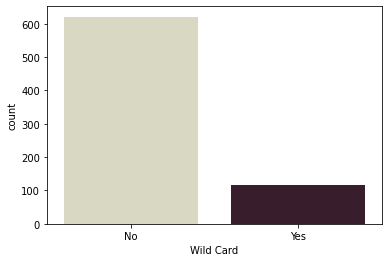

In [20]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Wild Card', data=bigg_boss, palette="ch:.45")

In [21]:
# Common people has many professions, so clubbing them into one category
bigg_boss['Profession'] = bigg_boss['Profession'].fillna('UNKNOWN')
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession']='Commoner'

In [22]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,6))
sns.countplot(x='Profession', data=bigg_boss, order=bigg_boss['Profession'].value_counts().index)
plt.xticks(rotation=90)

Actress                  161
Actor                    118
Soap Actress              57
Model                     56
Singer                    48
Commoner                  40
Soap Actor                36
TV Anchor                 23
Reality Show Alumni       21
Social Media Star         18
Comedian                  18
Radio Jockey              15
News Presenter            13
Choreographer             11
Sports Person              9
Film Director              8
Activist                   7
Pageant Winner             6
International Star         6
Video Jockey               6
Politician                 5
Producer                   5
Swamiji                    4
LGBT                       4
Controversial Fame         4
Dancer                     4
Wrestler                   3
Businessman                2
Musician                   2
Stage Actress              2
Fashion Designer           2
Journalist                 2
Actor & Actress            1
Cartoonist                 1
Astrologer    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

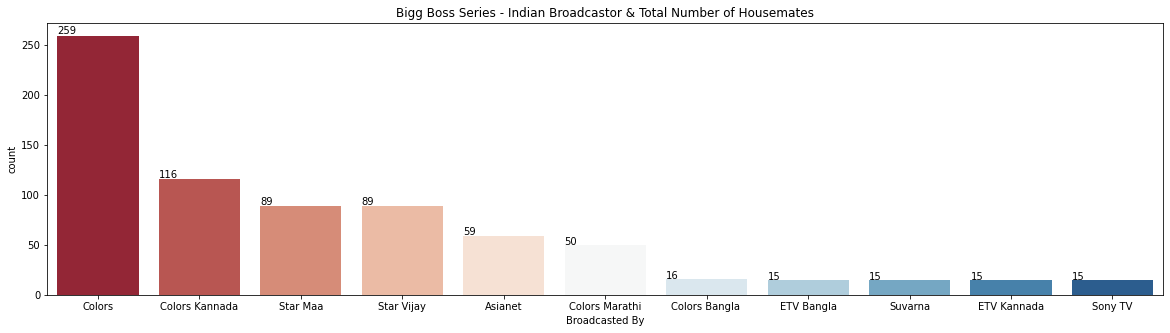

In [23]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu', order=bigg_boss['Broadcasted By'].value_counts().index)
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [24]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(bigg_boss['Broadcasted By'].str.split().str.get(0), data=bigg_boss, palette='Set3', order=bigg_boss['Broadcasted By'].str.split().str.get(0).value_counts().index)
ax.set_title('BiggBoss Series - Media House')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [25]:
# Bigg Boss main hosts and number of seasons they hosted
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan            12
Sudeep                  8
Kamal Haasan            5
Mahesh Manjrekar        3
Mohanlal                3
Nagarjuna               3
Mithun Chakraborthy     2
Amitabh Bachchan        1
Arshad Warsi            1
Jr. NTR                 1
Nani                    1
Shilpa Shetty           1
Name: Season Number, dtype: int64

In [26]:
# Temporary or Guest host who hosted the week-end episodes
bigg_boss.groupby('Guest Host Name')['Season Number'].nunique().nlargest(10)

Guest Host Name
Farah Khan           1
Ramya Krishnan       1
Samantha Akkineni    1
Sanjay Dutt          1
Siddhartha Jadhav    1
Name: Season Number, dtype: int64

In [27]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts(), "\n")

# In percentage
print(round(bigg_boss['Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

Female         386
Male           345
Transgender      6
Couple           1
Name: Gender, dtype: int64 

Female         52%
Male           47%
Transgender     1%
Couple          0%
Name: Gender, dtype: object


In [28]:
# Maximum TRP of Bigg Boss India seasons (Big Brother in India)
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 20.1 

Language  Season Number
  Telugu              4


In [29]:
# Smallest season of Indian Bigg Boss seasons
print("Smallest season",bigg_boss['Season Length'].min(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].min()][["Language","Season Number"]].head(1).to_string(index=False))

Smallest season 70 days 

Language  Season Number
  Telugu              1


In [30]:
# Longest season of Indian Bigg Boss seasons
print("Longest season",bigg_boss['Season Length'].max(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Longest season 143 days 

Language  Season Number
   Hindi             14


In [31]:
print("Maximum number of contestants in one season:",bigg_boss['Number of Housemates'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of Housemates']==bigg_boss['Number of Housemates'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum number of contestants in one season: 23 

  Language  Season Number
 Malayalam              2


In [32]:
print("Maximum number of evictions faced in one season:",bigg_boss['Number of Evictions Faced'].max(), "\n")
print("\nTop 3 contestants who faced maximum number of evictions\n")
print(bigg_boss.loc[bigg_boss['Number of Evictions Faced']>=bigg_boss['Number of Evictions Faced'].max()-3][["Language","Season Number","Name","Number of Evictions Faced"]].head(3).sort_values("Number of Evictions Faced",ascending=False).to_string(index=False))

Maximum number of evictions faced in one season: 17 


Top 3 contestants who faced maximum number of evictions

Language  Season Number                Name  Number of Evictions Faced
   Hindi             14       Rubina Dilaik                         17
 Kannada              8  Prashanth Sambargi                         15
   Hindi             14        Rahul Vaidya                         14


In [33]:
bigg_boss['Season Length in weeks'] = round(bigg_boss['Season Length']/7,0).astype(pd.Int32Dtype())
bigg_boss['Evictions Faced Percentage'] = round(bigg_boss['Number of Evictions Faced']/bigg_boss['Season Length in weeks']*100,0).astype(pd.Int32Dtype())
print("Maximum percentage of evictions faced in one season:",bigg_boss['Evictions Faced Percentage'].max(), "%\n")
print("\nTop 3 contestants who faced maximum percentage of evictions (they were in nominations almost every week)\n")
print(bigg_boss.loc[bigg_boss['Evictions Faced Percentage']>=bigg_boss['Evictions Faced Percentage'].max()-5][["Language","Season Number","Name","Number of Evictions Faced","Season Length in weeks","Evictions Faced Percentage"]].head(3).sort_values("Evictions Faced Percentage",ascending=False).to_string(index=False))

Maximum percentage of evictions faced in one season: 88 %


Top 3 contestants who faced maximum percentage of evictions (they were in nominations almost every week)

  Language  Season Number                Name  Number of Evictions Faced  Season Length in weeks  Evictions Faced Percentage
   Kannada              8  Prashanth Sambargi                         15                      17                          88
 Malayalam              3          Sai Vishnu                         12                      14                          86
     Hindi             14       Rubina Dilaik                         17                      20                          85


In [34]:
print("Maximum number of re-entries:",bigg_boss['Number of re-entries'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of re-entries']>=bigg_boss['Number of re-entries'].max()-1][["Language","Season Number","Name","Number of re-entries"]].head(5).sort_values("Number of re-entries",ascending=False).to_string(index=False))

Maximum number of re-entries: 3 

Language  Season Number          Name  Number of re-entries
   Hindi             14   Vikas Gupta                     3
  Telugu              1  Mumaith Khan                     2
  Telugu              2   Nutan Naidu                     2


In [35]:
print("Maximum number of times elected as captain:",bigg_boss['Number of times elected as Captain'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of times elected as Captain']>=bigg_boss['Number of times elected as Captain'].max()-1][["Language","Season Number","Name","Number of times elected as Captain"]].head(6).sort_values("Number of times elected as Captain",ascending=False).to_string(index=False))

Maximum number of times elected as captain: 5 

  Language  Season Number            Name  Number of times elected as Captain
     Hindi             12     Surbhi Rana                                   5
     Hindi              9   Prince Narula                                   4
     Hindi             10  Manveer Gurjar                                   4
 Malayalam              2   Saju Navodaya                                   4


In [36]:
# Many contestants entered via wild card, but few managed to go to Finale
bigg_boss.loc[(bigg_boss['Wild Card']=='Yes') & (bigg_boss['Finalist']==1), :]

Language  Season Number                      Name           Profession  \
44       Hindi              3              Pravesh Rana                Model   
59       Hindi              4  Dalip Singh Rana (Khali)             Wrestler   
60       Hindi              4              Dolly Bindra              Actress   
75       Hindi              5             Amar Upadhyay                Actor   
76       Hindi              5        Siddharth Bhardwaj  Reality Show Alumni   
77       Hindi              5          Akashdeep Saigal                Actor   
96       Hindi              6             Imam Siddique  Reality Show Alumni   
115      Hindi              7                 Ajaz Khan                Actor   
133      Hindi              8            Ali Quli Mirza               Singer   
135      Hindi              8             Dimpy Ganguly            TV Anchor   
151      Hindi              9             Rishabh Sinha           Soap Actor   
250      Hindi             14                  Aly Goni                Actor   
253      Hindi             14              Rakhi Sawant              Actress   
435     Telugu              1                   Navdeep                Actor   
526      Tamil              1             Harish Kalyan                Actor   
544      Tamil              2             Vijayalakshmi              Actress   
613    Marathi              1          Sharmishtha Raut              Actress   
632    Marathi              2             Aroh Velankar                Actor   
696  Malayalam              1             Shiyas Kareem                Actor   

     Gender Entry Date Elimination Date  Elimination Week Number Wild Card  \
44     Male        NaT              NaT                       12       Yes   
59     Male        NaT       2011-01-08                       14       Yes   
60   Female        NaT       2011-01-08                       14       Yes   
75     Male        NaT       2012-01-07                       14       Yes   
76     Male        NaT       2012-01-07                       14       Yes   
77     Male        NaT       2012-01-07                       14       Yes   
96     Male        NaT       2013-01-12                       14       Yes   
115    Male        NaT       2013-12-28                       15       Yes   
133    Male        NaT       2015-01-03                       15       Yes   
135  Female        NaT       2015-01-03                       15       Yes   
151    Male        NaT       2016-01-23                       15       Yes   
250    Male        NaT              NaT                       20       Yes   
253  Female        NaT              NaT                       20       Yes   
435    Male 2017-08-14       2017-09-24                       10       Yes   
526    Male        NaT       2017-09-30                       14       Yes   
544  Female        NaT       2018-09-30                       15       Yes   
613  Female        NaT              NaT                       14       Yes   
632    Male        NaT              NaT                       14       Yes   
696    Male        NaT              NaT                       14       Yes   

     Season Length  Number of Housemates Season Start Date Season End Date  \
44              84                    15        2009-10-04      2009-12-26   
59              96                    16        2010-10-03      2011-01-08   
60              96                    16        2010-10-03      2011-01-08   
75              98                    18        2011-10-02      2012-01-07   
76              98                    18        2011-10-02      2012-01-07   
77              98                    18        2011-10-02      2012-01-07   
96              97                    19        2012-10-07      2013-01-12   
115            105                    20        2013-09-15      2013-12-28   
133            105                    19        2014-09-21      2015-01-03   
135            105                    19        2014-09-21      

In [37]:
print("Total Bigg Boss season winners",bigg_boss['Winner'].sum().astype(int), "(out of",bigg_boss['Finalist'].sum(),"finalists)")

Total Bigg Boss season winners 36 (out of 166 finalists)


In [38]:
bigg_boss.loc[bigg_boss.Winner==1]

Language  Season Number               Name           Profession  Gender  \
8        Hindi              1          Rahul Roy                Actor    Male   
16       Hindi              2   Ashutosh Kaushik  Reality Show Alumni    Male   
42       Hindi              3   Vindu Dara Singh                Actor    Male   
57       Hindi              4      Shweta Tiwari         Soap Actress  Female   
62       Hindi              5        Juhi Parmar         Soap Actress  Female   
92       Hindi              6   Urvashi Dholakia         Soap Actress  Female   
102      Hindi              7        Gauhar Khan              Actress  Female   
121      Hindi              8      Gautam Gulati                Actor    Male   
144      Hindi              9      Prince Narula  Reality Show Alumni    Male   
165      Hindi             10     Manveer Gurjar             Commoner    Male   
189      Hindi             11      Shilpa Shinde         Soap Actress  Female   
196      Hindi             12       Dipika Kakar              Actress  Female   
225      Hindi             13   Siddharth Shukla           Soap Actor    Male   
244      Hindi             14      Rubina Dilaik         Soap Actress  Female   
285    Kannada              1  Vijay Raghavendra                Actor    Male   
290    Kannada              2        Akul Balaji            TV Anchor    Male   
317    Kannada              3             Shruti              Actress  Female   
331    Kannada              4            Pratham        Film Director    Male   
342    Kannada              5     Chandan Shetty               Singer    Male   
375    Kannada              6       Shashi Kumar             Commoner    Male   
395    Kannada              7       Shine Shetty                Actor    Male   
406    Kannada              8     Manju Pavagada             Comedian    Male   
433     Telugu              1        Siva Balaji                Actor    Male   
443     Telugu              2      Kaushal Manda                Actor    Male   
462     Telugu              3    Rahul Sipligunj               Singer    Male   
471     Telugu              4            Abijeet                Actor    Male   
509      Tamil              1       Aarav Nafeez                Model    Male   
538      Tamil              2          Riythvika              Actress  Female   
552      Tamil              3          Mugen Rao               Singer    Male   
563      Tamil              4       Aari Arjunan                Actor    Male   
603    Marathi              1        Megha Dhade              Actress  Female   
625    Marathi              2        Shiv Thakre  Reality Show Alumni    Male   
649    Bengali              1         Aneek Dhar               Singer    Male   
666    Bengali              2    Joyjit Banerjee           Soap Actor    Male   
691  Malayalam              1  Sabumon Abdusamad            TV Anchor    Male   
727  Malayalam              3         Manikuttan                Actor    Male   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
8   2006-11-03              NaT                     <NA>        No   
16  2008-08-17              NaT                     <NA>        No   
42  2009-10-04              NaT                     <NA>        No   
57  2010-10-03              NaT                     <NA>        No   
62  2011-10-02              NaT                     <NA>        No   
92  2012-10-07              NaT                     <NA>        No   
102 2013-09-15              NaT                     <NA>        No   
121 2014-09-21              NaT                     <NA>        No   
144 2015-10-11              NaT                     <NA>        No   
165 2016-10-16              NaT                     <NA>        No   
189 2017-10-01              NaT                     <NA>        No   
196 2018-09-16              NaT                     <NA>        No   
225 2019-09-29              NaT                     <NA>        No   
244 2020-10-03              

In [39]:
# Sum of prize money won by all BB Season winners/participants, in India
print(format_currency(bigg_boss['Prize Money (INR)'].sum(), 'INR', locale='en_IN').replace(".00", ""))

₹ 20,21,00,000


In [40]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  10
Soap Actress            5
Actress                 5
Singer                  4
Reality Show Alumni     3
Commoner                2
TV Anchor               2
Soap Actor              2
Film Director           1
Model                   1
Comedian                1
Name: Profession, dtype: int64

In [41]:
# Gender of Season title Winners
print(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(),'\n')

# In percentage
print(round(bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

Male      26
Female    10
Name: Gender, dtype: int64 

Male      72%
Female    28%
Name: Gender, dtype: object


In [42]:
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    36
Name: Wild Card, dtype: int64

In [43]:
bigg_boss.loc[bigg_boss.Winner==1,'Season Length'].value_counts().sort_index()

70      1
84      1
86      1
90      1
95      1
96      1
97      2
98      9
100     1
105    10
106     2
112     2
113     1
117     1
140     1
143     1
Name: Season Length, dtype: int64

In [44]:
bigg_boss.loc[bigg_boss.Winner==1,'Number of Housemates'].value_counts().sort_index()

15    6
16    3
17    4
18    9
19    5
20    7
22    2
Name: Number of Housemates, dtype: int64

In [45]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

4     7
5     4
6     5
7     6
8     1
9     5
10    1
11    2
12    3
17    1
Name: Number of Evictions Faced, dtype: Int64

In [46]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0    36
Name: Number of re-entries, dtype: Int64

In [47]:
# Bigg Boss title winners number of times elected as captain
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()

0     9
1    10
2    12
3     1
4     2
Name: Number of times elected as Captain, dtype: Int64

In [48]:
lang='Hindi'
# All Bigg Boss Hindi Participants
bigg_boss.loc[(bigg_boss['Language']==lang)]

Language  Season Number              Name      Profession       Gender  \
0      Hindi              1         Amit Sadh      Soap Actor         Male   
1      Hindi              1     Anupama Verma           Model       Female   
2      Hindi              1        Aryan Vaid  Pageant Winner         Male   
3      Hindi              1     Bobby Darling            LGBT  Transgender   
4      Hindi              1     Carol Gracias           Model       Female   
..       ...            ...               ...             ...          ...   
269    Hindi             15      Simba Nagpal      Soap Actor         Male   
270    Hindi             15  Tejasswi Prakash    Soap Actress       Female   
271    Hindi             15         Umar Riaz          Doctor         Male   
272    Hindi             15      Vidhi Pandya    Soap Actress       Female   
273    Hindi             15     Vishal Kotian      Soap Actor         Male   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
0   2006-11-03              NaT                       10        No   
1   2006-11-03              NaT                        5        No   
2   2006-11-03              NaT                        4        No   
3   2006-11-03              NaT                        1        No   
4   2006-11-03       2007-01-26                       12        No   
..         ...              ...                      ...       ...   
269 2021-10-02              NaT                     <NA>        No   
270 2021-10-02              NaT                     <NA>        No   
271 2021-10-02              NaT                     <NA>        No   
272 2021-10-02              NaT                     <NA>        No   
273 2021-10-02              NaT                     <NA>        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
0               86                    15        2006-11-03      2007-01-26   
1               86                    15        2006-11-03      2007-01-26   
2               86                    15        2006-11-03      2007-01-26   
3               86                    15        2006-11-03      2007-01-26   
4               86                    15        2006-11-03      2007-01-26   
..             ...                   ...               ...             ...   
269            143                    16        2021-10-02      2022-02-21   
270            143                    16        2021-10-02      2022-02-21   
271            143                    16        2021-10-02      2022-02-21   
272            143                    16        2021-10-02      2022-02-21   
273            143                    16        2021-10-02      2022-02-21   

        Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
0    Arshad Warsi             NaN                0.0        Sony TV   
1    Arshad Warsi             NaN                0.0        Sony TV   
2    Arshad Warsi             NaN                0.0        Sony TV   
3    Arshad Warsi             NaN                0.0        Sony TV   
4    Arshad Warsi             NaN                0.0        Sony TV   
..            ...             ...                ...            ...   
269   Salman Khan             NaN                NaN         Colors   
270   Salman Khan             NaN                NaN         Colors   
271   Salman Khan             NaN                NaN         Colors   
272   Salman Khan             NaN                NaN         Colors   
273   Salman Khan             NaN                NaN         Colors   

     Average TRP  Number of Evictions Faced  Number of re-entries  \
0           2.72                          3                     0   
1           2.72                          1                     0   
2           2.72                          1                     0   
3           2.72                          1                     0   
4           2.72                          6                     0   
..           ...      

In [49]:
# Bigg Boss Hindi Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

Language  Season Number              Name           Profession  Gender  \
8      Hindi              1         Rahul Roy                Actor    Male   
16     Hindi              2  Ashutosh Kaushik  Reality Show Alumni    Male   
42     Hindi              3  Vindu Dara Singh                Actor    Male   
57     Hindi              4     Shweta Tiwari         Soap Actress  Female   
62     Hindi              5       Juhi Parmar         Soap Actress  Female   
92     Hindi              6  Urvashi Dholakia         Soap Actress  Female   
102    Hindi              7       Gauhar Khan              Actress  Female   
121    Hindi              8     Gautam Gulati                Actor    Male   
144    Hindi              9     Prince Narula  Reality Show Alumni    Male   
165    Hindi             10    Manveer Gurjar             Commoner    Male   
189    Hindi             11     Shilpa Shinde         Soap Actress  Female   
196    Hindi             12      Dipika Kakar              Actress  Female   
225    Hindi             13  Siddharth Shukla           Soap Actor    Male   
244    Hindi             14     Rubina Dilaik         Soap Actress  Female   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
8   2006-11-03              NaT                     <NA>        No   
16  2008-08-17              NaT                     <NA>        No   
42  2009-10-04              NaT                     <NA>        No   
57  2010-10-03              NaT                     <NA>        No   
62  2011-10-02              NaT                     <NA>        No   
92  2012-10-07              NaT                     <NA>        No   
102 2013-09-15              NaT                     <NA>        No   
121 2014-09-21              NaT                     <NA>        No   
144 2015-10-11              NaT                     <NA>        No   
165 2016-10-16              NaT                     <NA>        No   
189 2017-10-01              NaT                     <NA>        No   
196 2018-09-16              NaT                     <NA>        No   
225 2019-09-29              NaT                     <NA>        No   
244 2020-10-03              NaT                     <NA>        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
8               86                    15        2006-11-03      2007-01-26   
16              98                    15        2008-08-17      2008-11-22   
42              84                    15        2009-10-04      2009-12-26   
57              96                    16        2010-10-03      2011-01-08   
62              98                    18        2011-10-02      2012-01-07   
92              97                    19        2012-10-07      2013-01-12   
102            105                    20        2013-09-15      2013-12-28   
121            105                    19        2014-09-21      2015-01-03   
144            105                    20        2015-10-11      2016-01-23   
165            105                    18        2016-10-16      2017-01-28   
189            106                    19        2017-10-01      2018-01-14   
196            105                    20        2018-09-16      2018-12-30   
225            140                    22        2019-09-29      2020-02-15   
244            143                    22        2020-10-03      2021-02-21   

            Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
8        Arshad Warsi             NaN         10000000.0        Sony TV   
16      Shilpa Shetty             NaN         10000000.0         Colors   
42   Amitabh Bachchan             NaN         10000000.0         Colors   
57        Salman Khan             NaN         10000000.0         Colors   
62        Salman Khan     Sanjay Dutt         10000000.0         Colors   
92        Salman Khan             NaN          5000000.0         Colors   
102       Salman Khan             NaN          5000000.0         Colors   
121       S

In [50]:
# Bigg Boss Hindi current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Season Number']==15), :]

Language  Season Number              Name           Profession  Gender  \
258    Hindi             15       Afsana Khan               Singer  Female   
259    Hindi             15       Akasa Singh               Singer  Female   
260    Hindi             15       Donal Bisht         Soap Actress  Female   
261    Hindi             15    Ieshaan Sehgal           Soap Actor    Male   
262    Hindi             15    Jay Bhanushali                Actor    Male   
263    Hindi             15      Karan Kundra           Soap Actor    Male   
264    Hindi             15       Miesha Iyer  Reality Show Alumni  Female   
265    Hindi             15      Nishant Bhat        Choreographer    Male   
266    Hindi             15   Pratik Sehajpal  Reality Show Alumni    Male   
267    Hindi             15      Sahil Shroff                Actor    Male   
268    Hindi             15    Shamita Shetty              Actress  Female   
269    Hindi             15      Simba Nagpal           Soap Actor    Male   
270    Hindi             15  Tejasswi Prakash         Soap Actress  Female   
271    Hindi             15         Umar Riaz               Doctor    Male   
272    Hindi             15      Vidhi Pandya         Soap Actress  Female   
273    Hindi             15     Vishal Kotian           Soap Actor    Male   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
258 2021-10-02              NaT                     <NA>        No   
259 2021-10-02              NaT                     <NA>        No   
260 2021-10-02              NaT                     <NA>        No   
261 2021-10-02              NaT                     <NA>        No   
262 2021-10-02              NaT                     <NA>        No   
263 2021-10-02              NaT                     <NA>        No   
264 2021-10-02              NaT                     <NA>        No   
265 2021-10-02              NaT                     <NA>        No   
266 2021-10-02              NaT                     <NA>        No   
267 2021-10-02              NaT                     <NA>        No   
268 2021-10-02              NaT                     <NA>        No   
269 2021-10-02              NaT                     <NA>        No   
270 2021-10-02              NaT                     <NA>        No   
271 2021-10-02              NaT                     <NA>        No   
272 2021-10-02              NaT                     <NA>        No   
273 2021-10-02              NaT                     <NA>        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
258            143                    16        2021-10-02      2022-02-21   
259            143                    16        2021-10-02      2022-02-21   
260            143                    16        2021-10-02      2022-02-21   
261            143                    16        2021-10-02      2022-02-21   
262            143                    16        2021-10-02      2022-02-21   
263            143                    16        2021-10-02      2022-02-21   
264            143                    16        2021-10-02      2022-02-21   
265            143                    16        2021-10-02      2022-02-21   
266            143                    16        2021-10-02      2022-02-21   
267            143                    16        2021-10-02      2022-02-21   
268            143                    16        2021-10-02      2022-02-21   
269            143                    16        2021-10-02      2022-02-21   
270            143                    16        2021-10-02      2022-02-21   
271            143                    16        2021-10-02      2022-02-21   
272            143                    16        2021-10-02      2022-02-21   
273            143                    16        2021-10-02      2022-02-21   

       Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
258  Salman Khan             NaN                NaN         Colors   
259  Salman Khan   

In [51]:
# Bigg Boss Hindi Housemate's Gender
print(bigg_boss.loc[(bigg_boss['Language']==lang), 'Gender'].value_counts(), "\n")

Female         141
Male           131
Transgender      2
Name: Gender, dtype: int64 



In [52]:
print("\nTop 2 Hindi contestants who faced maximum number of evictions\n")
tmax=bigg_boss.loc[(bigg_boss['Language']==lang),'Number of Evictions Faced'].max()
print(bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Number of Evictions Faced']>=tmax-4)][["Season Number","Name","Number of Evictions Faced"]].head(6).sort_values("Number of Evictions Faced",ascending=False).to_string(index=False))


Top 2 Hindi contestants who faced maximum number of evictions

 Season Number           Name  Number of Evictions Faced
            14  Rubina Dilaik                         17
            14   Rahul Vaidya                         14


In [53]:
print("\nTop 3 Hindi contestants who faced maximum percentage of evictions (they were in nominations almost every week)\n")
tpmax=bigg_boss.loc[(bigg_boss['Language']==lang),'Evictions Faced Percentage'].max()
print(bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Evictions Faced Percentage']>=tpmax-10)][["Season Number","Name","Number of Evictions Faced","Season Length in weeks","Evictions Faced Percentage"]].head(6).sort_values("Evictions Faced Percentage",ascending=False).to_string(index=False))


Top 3 Hindi contestants who faced maximum percentage of evictions (they were in nominations almost every week)

 Season Number            Name  Number of Evictions Faced  Season Length in weeks  Evictions Faced Percentage
            14   Rubina Dilaik                         17                      20                          85
             8     Sonali Raut                         12                      15                          80
             9  Mandana Karimi                         12                      15                          80


### Preparing Data for ML modelling

In [54]:
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                            106
Elimination Date                      600
Elimination Week Number               176
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                         0
Host Name                               0
Guest Host Name                       650
Prize Money (INR)                      64
Broadcasted By                          0
Average TRP                           256
Number of Evictions Faced              52
Number of re-entries                   48
Number of times elected as Captain     80
Social Media Popularity               645
Finalist                               63
Winner                            

In [55]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [56]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)
# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)
# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())
# Filling NULLs in 'Number of times elected as Captain' with 0
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].fillna(0)

In [57]:
bigg_boss['Season Starting Year'] = bigg_boss['Season Start Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Ending Year'] = bigg_boss['Season End Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Starting Quarter'] = bigg_boss['Season Start Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss['Season Ending Quarter'] = bigg_boss['Season End Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Language                            738 non-null    object        
 1   Season Number                       738 non-null    int64         
 2   Name                                738 non-null    object        
 3   Profession                          738 non-null    object        
 4   Gender                              738 non-null    object        
 5   Entry Date                          632 non-null    datetime64[ns]
 6   Elimination Date                    138 non-null    datetime64[ns]
 7   Elimination Week Number             562 non-null    Int32         
 8   Wild Card                           738 non-null    object        
 9   Season Length                       738 non-null    int64         
 10  Number of Housemates      

In [58]:
bigg_boss.head()

Language  Season Number           Name      Profession       Gender  \
0    Hindi              1      Amit Sadh      Soap Actor         Male   
1    Hindi              1  Anupama Verma           Model       Female   
2    Hindi              1     Aryan Vaid  Pageant Winner         Male   
3    Hindi              1  Bobby Darling            LGBT  Transgender   
4    Hindi              1  Carol Gracias           Model       Female   

  Entry Date Elimination Date  Elimination Week Number Wild Card  \
0 2006-11-03              NaT                       10        No   
1 2006-11-03              NaT                        5        No   
2 2006-11-03              NaT                        4        No   
3 2006-11-03              NaT                        1        No   
4 2006-11-03       2007-01-26                       12        No   

   Season Length  Number of Housemates Season Start Date Season End Date  \
0             86                    15        2006-11-03      2007-01-26   
1             86                    15        2006-11-03      2007-01-26   
2             86                    15        2006-11-03      2007-01-26   
3             86                    15        2006-11-03      2007-01-26   
4             86                    15        2006-11-03      2007-01-26   

      Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
0  Arshad Warsi             NaN                0.0        Sony TV   
1  Arshad Warsi             NaN                0.0        Sony TV   
2  Arshad Warsi             NaN                0.0        Sony TV   
3  Arshad Warsi             NaN                0.0        Sony TV   
4  Arshad Warsi             NaN                0.0        Sony TV   

   Average TRP  Number of Evictions Faced  Number of re-entries  \
0         2.72                          3                     0   
1         2.72                          1                     0   
2         2.72                          1                     0   
3         2.72                          1                     0   
4         2.72                          6                     0   

   Number of times elected as Captain  Social Media Popularity  Finalist  \
0                                   0                     <NA>         0   
1                                   0                     <NA>         0   
2                                   0                     <NA>         0   
3                                   0                     <NA>         0   
4                                   0                     <NA>         1   

   Winner  Season Length in weeks  Evictions Faced Percentage  \
0     0.0                      12                          25   
1     0.0                      12                           8   
2     0.0                      12                           8   
3     0.0                      12                           8   
4     0.0                      12                          50   

   Season Starting Year  Season Ending Year  Season Starting Quarter  \
0                  2006                2007                        4   
1                  2006                2007                        4   
2                  2006                2007                        4   
3                  2006                2007                        4   
4                  2006                2007                        4   

   Season Ending Quarter  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [59]:
bigg_boss.tail()

Language  Season Number                      Name       Profession  \
733  Malayalam              3              Soorya Menon            Model   
734  Malayalam              3  Firoz Khan & Sajna Firoz  Actor & Actress   
735  Malayalam              3       Michelle Ann Daniel          Actress   
736  Malayalam              3              Angel Thomas            Model   
737  Malayalam              3            Remya Panickar          Actress   

     Gender Entry Date Elimination Date  Elimination Week Number Wild Card  \
733  Female 2021-02-14              NaT                       13        No   
734  Couple        NaT              NaT                        9       Yes   
735  Female        NaT              NaT                        3       Yes   
736  Female        NaT              NaT                        4       Yes   
737  Female        NaT              NaT                       13       Yes   

     Season Length  Number of Housemates Season Start Date Season End Date  \
733             95                    18        2021-02-14      2021-05-20   
734             95                    18        2021-02-14      2021-05-20   
735             95                    18        2021-02-14      2021-05-20   
736             95                    18        2021-02-14      2021-05-20   
737             95                    18        2021-02-14      2021-05-20   

    Host Name Guest Host Name  Prize Money (INR) Broadcasted By  Average TRP  \
733  Mohanlal             NaN                0.0        Asianet         12.4   
734  Mohanlal             NaN                0.0        Asianet         12.4   
735  Mohanlal             NaN                0.0        Asianet         12.4   
736  Mohanlal             NaN                0.0        Asianet         12.4   
737  Mohanlal             NaN                0.0        Asianet         12.4   

     Number of Evictions Faced  Number of re-entries  \
733                          8                     0   
734                          7                     0   
735                          1                     0   
736                          1                     0   
737                          3                     1   

     Number of times elected as Captain  Social Media Popularity  Finalist  \
733                                   1                     <NA>         0   
734                                   0                     <NA>         0   
735                                   0                     <NA>         0   
736                                   0                     <NA>         0   
737                                   1                     <NA>         0   

     Winner  Season Length in weeks  Evictions Faced Percentage  \
733     0.0                      14                          57   
734     0.0                      14                          50   
735     0.0                      14                           7   
736     0.0                      14                           7   
737     0.0                      14                          21   

     Season Starting Year  Season Ending Year  Season Starting Quarter  \
733                  2021                2021                        1   
734                  2021                2021                        1   
735                  2021                2021                        1   
736                  2021                2021                        1   
737                  2021                2021                        1   

     Season Ending Quarter  
733                      2  
734                      2  
735                      2  
736                      2  
737                      2

In [60]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

Language  Season Number                     Name     Profession  Gender  \
113    Hindi              7                Asif Azim          Model    Male   
363  Kannada              6           Andrew Jaypaul       Commoner    Male   
338  Kannada              4           Sukrutha Wagle        Actress  Female   
616  Marathi              2  Abhijit Awade Bichukale     Politician    Male   
485   Telugu              4              Surya Kiran  Film Director    Male   
308  Kannada              3        Kruthika Ravindra   Soap Actress  Female   
201    Hindi             12             Nirmal Singh       Commoner    Male   
674  Bengali              2        Srabanti Banerjee        Actress  Female   
293  Kannada              2          Deepika Kamaiah        Actress  Female   
34     Hindi              3              Jaya Sawant       Commoner  Female   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
113        NaT              NaT                        6       Yes   
363 2018-10-21              NaT                       14        No   
338        NaT              NaT                     <NA>       Yes   
616 2019-05-26              NaT                        4        No   
485 2020-09-06       2020-09-13                        1        No   
308 2015-10-25              NaT                        9        No   
201 2018-09-16              NaT                        2        No   
674 2016-04-04              NaT                     <NA>        No   
293 2014-06-29              NaT                       14        No   
34  2009-10-04              NaT                        1        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
113            105                    20        2013-09-15      2013-12-28   
363            100                    20        2018-10-21      2019-01-27   
338            112                    18        2016-10-09      2017-01-29   
616             98                    17        2019-05-26      2019-09-01   
485            105                    19        2020-09-06      2020-12-20   
308             98                    18        2015-10-25      2016-01-31   
201            105                    20        2018-09-16      2018-12-30   
674             97                    16        2016-04-04      2016-07-15   
293             98                    15        2014-06-29      2014-10-05   
34              84                    15        2009-10-04      2009-12-26   

               Host Name    Guest Host Name  Prize Money (INR)  \
113          Salman Khan                NaN                0.0   
363               Sudeep                NaN                0.0   
338               Sudeep                NaN                0.0   
616     Mahesh Manjrekar                NaN                0.0   
485            Nagarjuna  Samantha Akkineni                0.0   
308               Sudeep                NaN                0.0   
201          Salman Khan                NaN                0.0   
674  Mithun Chakraborthy                NaN                0.0   
293               Sudeep                NaN                0.0   
34      Amitabh Bachchan                NaN                0.0   

     Broadcasted By  Average TRP  Number of Evictions Faced  \
113          Colors     4.400000                          4   
363  Colors Kannada     8.044959                         11   
338  Colors Kannada     8.044959                          1   
616  Colors Marathi     8.044959                          3   
485        Star Maa    20.100000                          1   
308  Colors Kannada     8.044959                          5   
201          Colors     4.990000                          1   
674  Colors Bangla      6.500000                          1   
293         Suvarna     8.044959                          6   
34           Colors     2.830000                          1   

     Number of re-entries  Number of times elected as Captain  \
113               

In [61]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

Language  Season Number              Name           Profession  Gender  \
258    Hindi             15       Afsana Khan               Singer  Female   
259    Hindi             15       Akasa Singh               Singer  Female   
260    Hindi             15       Donal Bisht         Soap Actress  Female   
261    Hindi             15    Ieshaan Sehgal           Soap Actor    Male   
262    Hindi             15    Jay Bhanushali                Actor    Male   
263    Hindi             15      Karan Kundra           Soap Actor    Male   
264    Hindi             15       Miesha Iyer  Reality Show Alumni  Female   
265    Hindi             15      Nishant Bhat        Choreographer    Male   
266    Hindi             15   Pratik Sehajpal  Reality Show Alumni    Male   
267    Hindi             15      Sahil Shroff                Actor    Male   
268    Hindi             15    Shamita Shetty              Actress  Female   
269    Hindi             15      Simba Nagpal           Soap Actor    Male   
270    Hindi             15  Tejasswi Prakash         Soap Actress  Female   
271    Hindi             15         Umar Riaz               Doctor    Male   
272    Hindi             15      Vidhi Pandya         Soap Actress  Female   
273    Hindi             15     Vishal Kotian           Soap Actor    Male   

    Entry Date Elimination Date  Elimination Week Number Wild Card  \
258 2021-10-02              NaT                     <NA>        No   
259 2021-10-02              NaT                     <NA>        No   
260 2021-10-02              NaT                     <NA>        No   
261 2021-10-02              NaT                     <NA>        No   
262 2021-10-02              NaT                     <NA>        No   
263 2021-10-02              NaT                     <NA>        No   
264 2021-10-02              NaT                     <NA>        No   
265 2021-10-02              NaT                     <NA>        No   
266 2021-10-02              NaT                     <NA>        No   
267 2021-10-02              NaT                     <NA>        No   
268 2021-10-02              NaT                     <NA>        No   
269 2021-10-02              NaT                     <NA>        No   
270 2021-10-02              NaT                     <NA>        No   
271 2021-10-02              NaT                     <NA>        No   
272 2021-10-02              NaT                     <NA>        No   
273 2021-10-02              NaT                     <NA>        No   

     Season Length  Number of Housemates Season Start Date Season End Date  \
258            143                    16        2021-10-02      2022-02-21   
259            143                    16        2021-10-02      2022-02-21   
260            143                    16        2021-10-02      2022-02-21   
261            143                    16        2021-10-02      2022-02-21   
262            143                    16        2021-10-02      2022-02-21   
263            143                    16        2021-10-02      2022-02-21   
264            143                    16        2021-10-02      2022-02-21   
265            143                    16        2021-10-02      2022-02-21   
266            143                    16        2021-10-02      2022-02-21   
267            143                    16        2021-10-02      2022-02-21   
268            143                    16        2021-10-02      2022-02-21   
269            143                    16        2021-10-02      2022-02-21   
270            143                    16        2021-10-02      2022-02-21   
271            143                    16        2021-10-02      2022-02-21   
272            143                    16        2021-10-02      2022-02-21   
273            143                    16        2021-10-02      2022-02-21   

       Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
258  Salman Khan             NaN                NaN         Colors   
259  Salman Khan   

In [62]:
BB_Hindi_participants = test[['Name']]
BB_Hindi_participants.reset_index(drop=True, inplace=True)
BB_Hindi_participants

Name
0        Afsana Khan
1        Akasa Singh
2        Donal Bisht
3     Ieshaan Sehgal
4     Jay Bhanushali
5       Karan Kundra
6        Miesha Iyer
7       Nishant Bhat
8    Pratik Sehajpal
9       Sahil Shroff
10    Shamita Shetty
11      Simba Nagpal
12  Tejasswi Prakash
13         Umar Riaz
14      Vidhi Pandya
15     Vishal Kotian

In [63]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date",], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Winner"], axis=1, inplace=True)

In [64]:
train.head()

Language  Season Number      Profession       Gender  \
0    Hindi              1      Soap Actor         Male   
1    Hindi              1           Model       Female   
2    Hindi              1  Pageant Winner         Male   
3    Hindi              1            LGBT  Transgender   
4    Hindi              1           Model       Female   

   Elimination Week Number Wild Card  Season Length  Number of Housemates  \
0                       10        No             86                    15   
1                        5        No             86                    15   
2                        4        No             86                    15   
3                        1        No             86                    15   
4                       12        No             86                    15   

      Host Name Guest Host Name  Prize Money (INR) Broadcasted By  \
0  Arshad Warsi             NaN                0.0        Sony TV   
1  Arshad Warsi             NaN                0.0        Sony TV   
2  Arshad Warsi             NaN                0.0        Sony TV   
3  Arshad Warsi             NaN                0.0        Sony TV   
4  Arshad Warsi             NaN                0.0        Sony TV   

   Average TRP  Number of Evictions Faced  Number of re-entries  \
0         2.72                          3                     0   
1         2.72                          1                     0   
2         2.72                          1                     0   
3         2.72                          1                     0   
4         2.72                          6                     0   

   Number of times elected as Captain  Social Media Popularity  Finalist  \
0                                   0                     <NA>         0   
1                                   0                     <NA>         0   
2                                   0                     <NA>         0   
3                                   0                     <NA>         0   
4                                   0                     <NA>         1   

   Winner  Season Length in weeks  Evictions Faced Percentage  \
0     0.0                      12                          25   
1     0.0                      12                           8   
2     0.0                      12                           8   
3     0.0                      12                           8   
4     0.0                      12                          50   

   Season Starting Year  Season Ending Year  Season Starting Quarter  \
0                  2006                2007                        4   
1                  2006                2007                        4   
2                  2006                2007                        4   
3                  2006                2007                        4   
4                  2006                2007                        4   

   Season Ending Quarter  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [65]:
test.head()

Language  Season Number    Profession  Gender  Elimination Week Number  \
258    Hindi             15        Singer  Female                     <NA>   
259    Hindi             15        Singer  Female                     <NA>   
260    Hindi             15  Soap Actress  Female                     <NA>   
261    Hindi             15    Soap Actor    Male                     <NA>   
262    Hindi             15         Actor    Male                     <NA>   

    Wild Card  Season Length  Number of Housemates    Host Name  \
258        No            143                    16  Salman Khan   
259        No            143                    16  Salman Khan   
260        No            143                    16  Salman Khan   
261        No            143                    16  Salman Khan   
262        No            143                    16  Salman Khan   

    Guest Host Name  Prize Money (INR) Broadcasted By  Average TRP  \
258             NaN                NaN         Colors     8.044959   
259             NaN                NaN         Colors     8.044959   
260             NaN                NaN         Colors     8.044959   
261             NaN                NaN         Colors     8.044959   
262             NaN                NaN         Colors     8.044959   

     Number of Evictions Faced  Number of re-entries  \
258                          1                     0   
259                          1                     0   
260                          1                     0   
261                          1                     0   
262                          1                     0   

     Number of times elected as Captain  Social Media Popularity  Finalist  \
258                                   0                     <NA>      <NA>   
259                                   0                     <NA>      <NA>   
260                                   0                     <NA>      <NA>   
261                                   0                     <NA>      <NA>   
262                                   0                     <NA>      <NA>   

     Season Length in weeks  Evictions Faced Percentage  Season Starting Year  \
258                      20                        <NA>                  2021   
259                      20                        <NA>                  2021   
260                      20                        <NA>                  2021   
261                      20                        <NA>                  2021   
262                      20                        <NA>                  2021   

     Season Ending Year  Season Starting Quarter  Season Ending Quarter  
258                2022                        4                      1  
259                2022                        4                      1  
260                2022                        4                      1  
261                2022                        4                      1  
262                2022                        4                      1

In [66]:
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.666667
1.0     5.333333
Name: Winner, dtype: float64


In [67]:
# One Hot Encoding
target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [68]:
print(train2.shape)
print(test.shape)

(675, 308)
(16, 308)


In [69]:
train2.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4       0
Season Length_100             0
Season Length_86              0
Season Length_90              0
Season Length_95              0
                             ..
Social Media Popularity_7     0
Social Media Popularity_8     0
Social Media Popularity_9     0
Social Media Popularity_10    0
Language_Hindi                0
Length: 308, dtype: int64

In [70]:
train2.drop(["Profession_Doctor","Season Ending Year_2022","Season Number_15"], axis=1, inplace=True)
test.drop(["Profession_Doctor","Season Ending Year_2022","Season Number_15"], axis=1, inplace=True)

In [71]:
train2.head()

Language_Hindi  Language_Kannada  Language_Malayalam  Language_Marathi  \
0               1                 0                   0                 0   
1               1                 0                   0                 0   
2               1                 0                   0                 0   
3               1                 0                   0                 0   
4               1                 0                   0                 0   

   Language_Tamil  Language_Telugu  Season Number_2  Season Number_3  \
0               0                0                0                0   
1               0                0                0                0   
2               0                0                0                0   
3               0                0                0                0   
4               0                0                0                0   

   Season Number_4  Season Number_5  Season Number_6  Season Number_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Season Number_8  Season Number_9  Season Number_10  Season Number_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                0                 0                 0   

   Season Number_12  Season Number_13  Season Number_14  Profession_Actor  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Profession_Actor & Actress  Profession_Actress  Profession_Air Hostess  \
0                           0                   0                       0   
1                           0                   0                       0   
2                           0                   0                       0   
3                           0                   0                       0   
4                           0                   0                       0   

   Profession_Art Director  Profession_Astrologer  ...  \
0                        0                      0  ...   
1                        0                      0  ...   
2                        0                      0  ...   
3                        0                      0  ...   
4                        0                      0  ...   

   Season Starting Year_2016  Season Starting Year_2017  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Season Starting Year_2018  Season Starting Year_2019  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Season Starting Year_2020  Season Starting Year_2021  \
0                          0                          0   
1                          0                          0   
2                          0                          0

In [72]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [73]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2021)
print(x_train.shape, x_val.shape)

(472, 305) (203, 305)


In [74]:
x_train.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4      0
Season Length_105            0
Season Length_90             0
Season Length_95             0
Season Length_96             0
                            ..
Social Media Popularity_6    0
Social Media Popularity_7    0
Social Media Popularity_8    0
Social Media Popularity_9    0
Language_Hindi               0
Length: 305, dtype: int64

## Machine Learning Models

In [76]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [77]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2021, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 93.40000744500007
F1 score for C=1: 97.07894982967372
F1 score for C=10: 97.75811802553534
F1 score for C=100: 98.9557281798661
F1 score for C=1000: 99.49353378440287


In [78]:
logi = LogisticRegression(random_state=2021, C=100).fit(x_train, y_train)
logi

LogisticRegression(C=100, random_state=2021)

In [79]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.01477832512316
Accuracy Score - 99.01477832512316


In [80]:
# Confusion Matrix
plot_confusion_matrix()

In [81]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_Hindi_participants, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg.sort_values('Predicted_Winner', ascending=False)

Name  Predicted_Winner
8    Pratik Sehajpal          0.000698
2        Donal Bisht          0.000645
12  Tejasswi Prakash          0.000645
14      Vidhi Pandya          0.000645
4     Jay Bhanushali          0.000301
9       Sahil Shroff          0.000301
6        Miesha Iyer          0.000234
13         Umar Riaz          0.000211
7       Nishant Bhat          0.000196
10    Shamita Shetty          0.000073
0        Afsana Khan          0.000053
1        Akasa Singh          0.000053
3     Ieshaan Sehgal          0.000033
5       Karan Kundra          0.000033
11      Simba Nagpal          0.000033
15     Vishal Kotian          0.000033

In [82]:
winner_lg[winner_lg['Predicted_Winner'] == np.amax(winner_lg.Predicted_Winner)]

Name  Predicted_Winner
8  Pratik Sehajpal          0.000698

In [83]:
# Random Forest
rf = RandomForestClassifier(n_estimators=2000, random_state=2021).fit(x_train, y_train)
rf

RandomForestClassifier(n_estimators=2000, random_state=2021)

In [84]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 98.9557281798661
Accuracy Score - 99.01477832512316


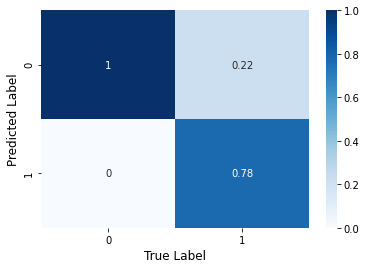

In [85]:
# Confusion Matrix
plot_confusion_matrix()

In [86]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_Hindi_participants, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf.sort_values('Predicted_Winner', ascending=False)

Name  Predicted_Winner
2        Donal Bisht            0.0185
12  Tejasswi Prakash            0.0185
14      Vidhi Pandya            0.0185
6        Miesha Iyer            0.0140
8    Pratik Sehajpal            0.0135
0        Afsana Khan            0.0070
1        Akasa Singh            0.0070
4     Jay Bhanushali            0.0060
9       Sahil Shroff            0.0060
10    Shamita Shetty            0.0060
3     Ieshaan Sehgal            0.0055
5       Karan Kundra            0.0055
11      Simba Nagpal            0.0055
15     Vishal Kotian            0.0055
7       Nishant Bhat            0.0045
13         Umar Riaz            0.0045

In [88]:
# Correlation matrix (Heatmap style)
corrmat = bigg_boss.corr()
f, ax = plt.subplots(figsize=(17, 11))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corrmat, vmax=1.0, linewidths=0.1, square=True, cmap="RdBu", linecolor='white', annot=True);

In [89]:
# Crosschecking Actor/Actress Gender
bigg_boss[bigg_boss['Profession'].str.contains('Act')].groupby('Gender')['Profession'].value_counts().unstack()

Profession  Activist  Actor  Actor & Actress  Actress  Soap Actor  \
Gender                                                              
Couple           NaN    NaN              1.0      NaN         NaN   
Female           3.0    NaN              NaN    161.0         NaN   
Male             4.0  118.0              NaN      NaN        36.0   

Profession  Soap Actress  Stage Actress  
Gender                                   
Couple               NaN            NaN  
Female              57.0            2.0  
Male                 NaN            NaN